# Аналіз алгоритмів
У цьому ноутбуці ми виконали аналіз різних алгоритмів обходу графів:

- **DFS**:
- **BFS**:

## Що було зроблено

1. **Генерація графів**: Згенерували випадкові графи для різних розмірів (10, 50, 100, 200, 500).
2. **Вимірювання часу виконання**: Зробили фнукцію, яка вимірю час виконання кожної функції.
3. **Візуалізація результатів**: Побудували графіки для порівняння продуктивності двох типів задання.


In [24]:
%pip install -q matplotlib
import lab
import random
import time
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


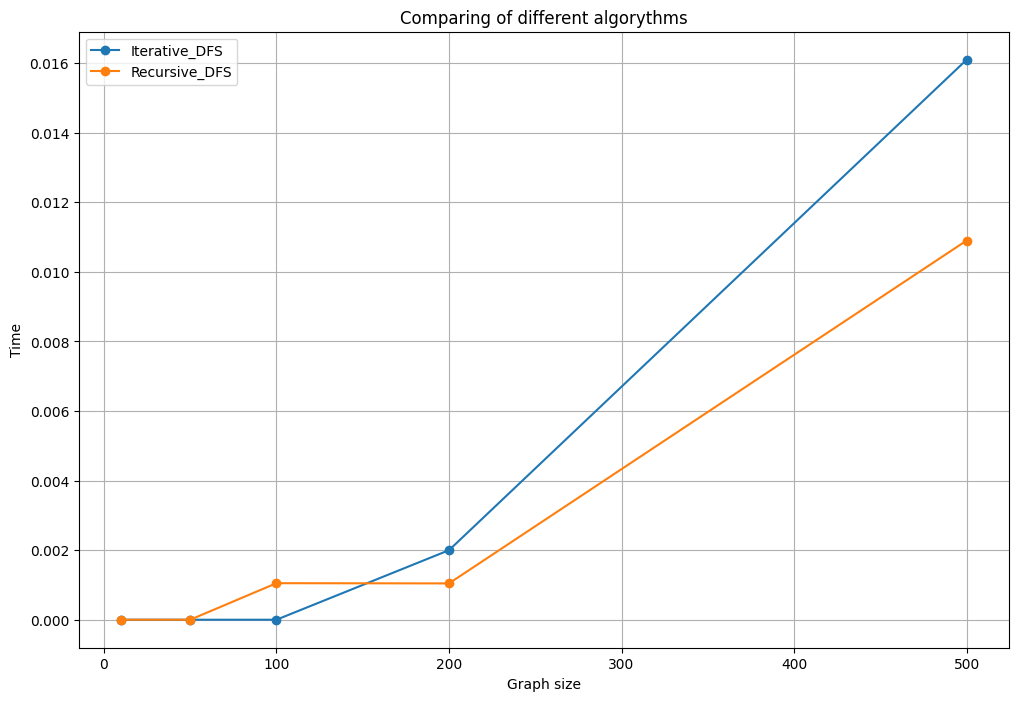

In [31]:
def generate_random_matrix(size):
    outp = [[random.randint(0,1) for _ in range(size)] for _ in range(size)]
    return outp

def matrix_to_dict(matrix):
    outp = {}
    for i, row in enumerate(matrix):
        outp[i] = [] 
        for idx, val in enumerate(row):
            if val == 1:
                outp[i].append(idx) 
    return outp


def timer(algorythm, graph, start):
    start_time = time.time()
    algorythm(graph, start)
    return time.time() - start_time

sizes = [10, 50, 100, 200, 500]
algorythms = {"Iterative_DFS": [],"Recursive_DFS": [], "BFS": []}
graph_setting__type = {"adjacency_matrix" : [], "adjacency_dict" : []}

for size in sizes:
    adjacency_matrix = generate_random_matrix(size)
    adjacency_dict = matrix_to_dict(generate_random_matrix(size))

    algorythms["Iterative_DFS"].append(timer(lab.iterative_adjacency_matrix_dfs, adjacency_matrix, 0))
    algorythms["Recursive_DFS"].append(timer(lab.recursive_adjacency_matrix_dfs, adjacency_matrix, 0))
    algorythms["BFS"].append(timer(lab.iterative_adjacency_matrix_bfs, adjacency_matrix, 0))

    graph_setting__type["adjacency_matrix"].append((timer(lab.iterative_adjacency_matrix_dfs, adjacency_matrix, 0) + 
                                                   timer(lab.iterative_adjacency_matrix_bfs, adjacency_matrix, 0)) / 2)
    graph_setting__type["adjacency_dict"].append((timer(lab.iterative_adjacency_dict_bfs, adjacency_dict, 0) + 
                                                 timer(lab.iterative_adjacency_dict_dfs, adjacency_dict, 0)) /2)

plt.figure(figsize=(12, 8))

for algorythm, times in algorythms.items():
    plt.plot(sizes, times, marker='o', label=algorythm)

plt.title("Comparing of different algorythms")
plt.xlabel("Graph size")
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()


# Порівняння алгоритмів
Порівнюючи **BFS** та **DFS** ми бачимо наскільки BFS довше працює, це через те, що йому потрібно ійти фактично у "всі сторони" і через це він затрачає більше часу, зате ми оримуємо найкоротший шлях. 

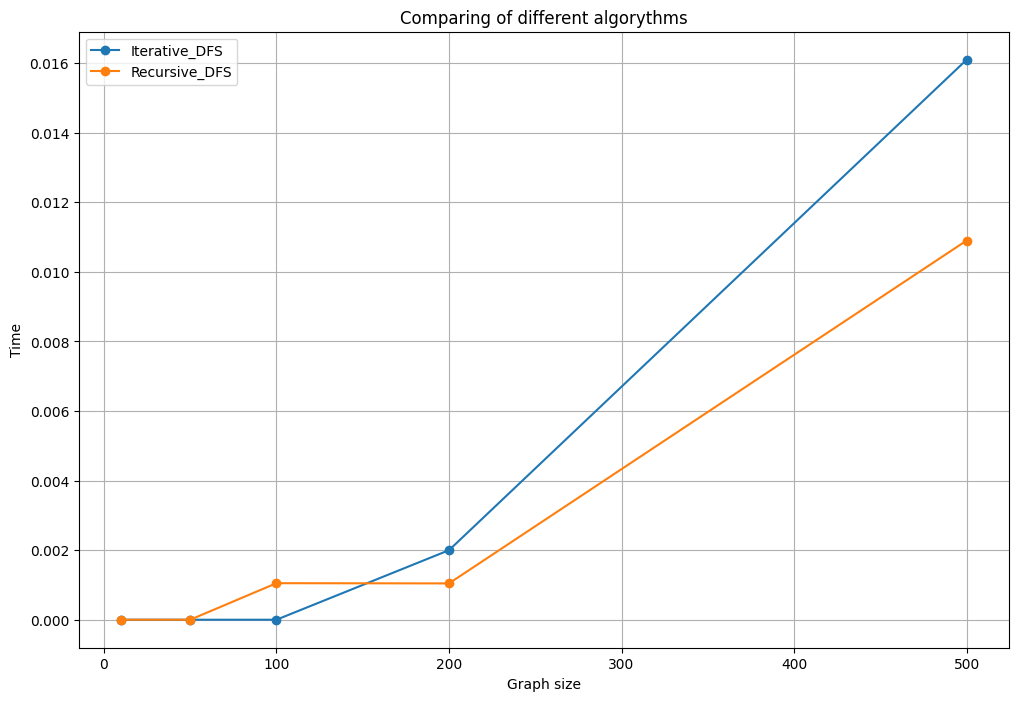

In [33]:
plt.figure(figsize=(12, 8))
for algorythm, times in algorythms.items():
    if algorythm == 'BFS':
        continue
    plt.plot(sizes, times, marker='o', label=algorythm)

plt.title("Comparing of different algorythms")
plt.xlabel("Graph size")
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

## Порівняння рекурсивного алгоритму та ітеративного
Тут ми бачимо, що рекурсивний алгоритм працює швидше на більших графах, це є так через зменшення додаткових зайвих витрат витрат



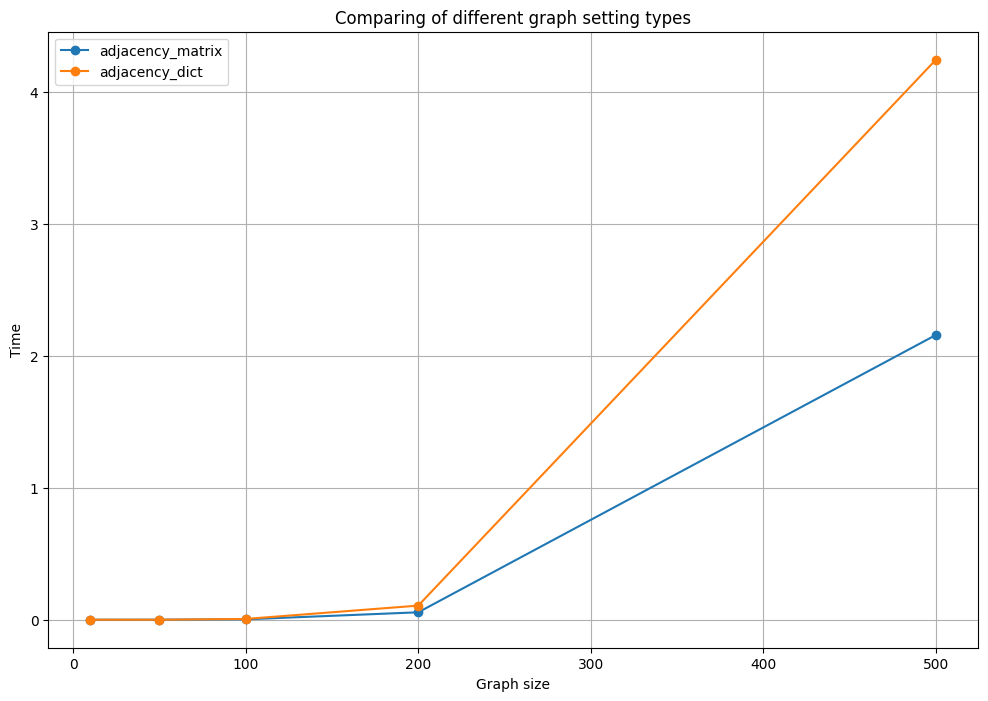

In [34]:
plt.figure(figsize=(12, 8))
for type, times in graph_setting__type.items():
    plt.plot(sizes, times, marker='o', label=type)

plt.title("Comparing of different graph setting types")
plt.xlabel("Graph size")
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

## Порівняння способів задання графів

При порівнянні спосбів задання ми бачимо, що List працює швидше ніж словник, це через те, що в словнику хешуються ключі, і при колізії, щоб звернутися по ключу нафкрищий випадок складності це O(1), а в найгіршому O(n)